In [1]:
########################################################################
# Author    : A. Alsema
# Date      : Augustus 2021
# Dataset   : Visium Spatial Transcriptomics for MS lesions
# Purpose   : create dotplot with the expression of selected marker genes per cluster
# Required inputs: 
#    - "3.WM.clustered.res0.2.rds"
#    - markers_sig_up_lognorm_res0.2.csv 
# Output    : figure 1f. PDF.
#########################################################################

require(Seurat)
require(ggplot2)
library(dplyr)
library(plyr)
library(cowplot)
rm(list = ls())

res = 0.2
datasets <- readRDS(file = paste0("./RData/seurat/3.WM.clustered.res", res, ".rds"))
levels(datasets$Group)

Loading required package: Seurat

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




[1] "CWM"       "NAWM"      "active"    "act/inact"

In [2]:
levels(Idents(datasets))

[1] "0" "1" "2" "3" "4" "5"

In [4]:
#manual step: prioritize interesting cluster markers for dotplot
markers <- read.csv("/data/bcn/Datasets/ST_AAL_JK_WM/Routput/Seurat/Clustering/markers_sig_up_lognorm_res0.2.csv")
sorted.markers <- markers %>% 
    filter(p_val_adj < 0.05) %>%  
    filter(avg_log2FC > 0) %>%  
    group_by(cluster) %>% 
    top_n(n = 10, wt = avg_log2FC)
sorted.markers

X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
TF,0.000000e+00,1.2227663,0.880,0.523,0.000000e+00,0,TF
CNP,0.000000e+00,1.1444724,0.951,0.620,0.000000e+00,0,CNP
MAG,0.000000e+00,1.1327304,0.719,0.341,0.000000e+00,0,MAG
MOG,0.000000e+00,1.1057381,0.530,0.206,0.000000e+00,0,MOG
PPP1R14A,0.000000e+00,1.0976607,0.769,0.398,0.000000e+00,0,PPP1R14A
MARCKSL1,0.000000e+00,1.0925143,0.802,0.436,0.000000e+00,0,MARCKSL1
ENPP2,0.000000e+00,1.0703310,0.695,0.344,0.000000e+00,0,ENPP2
PLP1,0.000000e+00,1.0472483,1.000,0.937,0.000000e+00,0,PLP1
APLP1,0.000000e+00,1.0423750,0.885,0.538,0.000000e+00,0,APLP1


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2

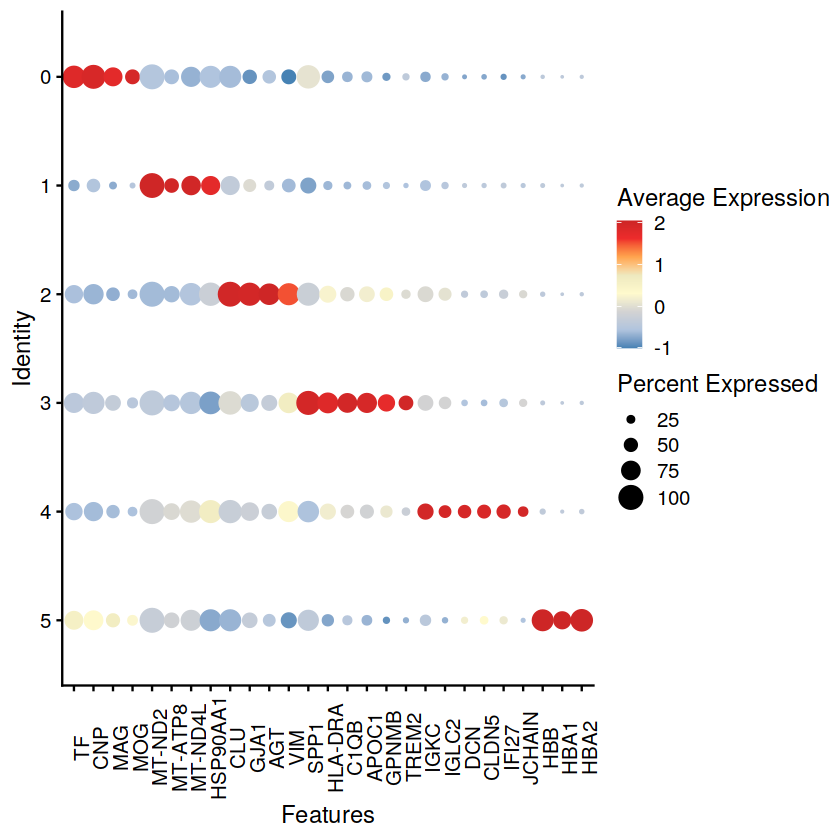

In [43]:
p <- DotPlot(
  datasets,
  assay = "Spatial", # default to active assay
  # selection of genes
  feature = rev(c("HBA2", "HBA1", "HBB", #heme binding
              "JCHAIN","IFI27", "CLDN5", "DCN", "IGLC2", "IGKC", # cluster 4, immune cell plus vasculature
              "TREM2", "GPNMB","APOC1",  "C1QB", "HLA-DRA", "SPP1",  #cluster 3
              "VIM",  "AGT", "GJA1", "CLU", # astrocyte-enriched?
              "HSP90AA1",  "MT-ND4L","MT-ATP8", "MT-ND2", #cluster 1
               "MOG", "MAG", "CNP","TF" # cluster 0
             )), 
  cols = c('grey', 'red1'),
  col.min = -2.5,
  col.max = 2.5,
  scale = T
)

p <- p + 
  theme(axis.text.x = element_text(angle = 90)) + 
  scale_y_discrete(limits=rev) +
  scale_colour_gradientn(colors = c("steelblue", "lightsteelblue", "lightgrey", "lemonchiffon1", "lemonchiffon2","tan1", "firebrick2", "firebrick3"))
p

pdf("Routput/Seurat/Figures/Dotplot_markers.pdf", width = 7, height = 7)
p
dev.off()
  